<a href="https://colab.research.google.com/github/skhardi/CS334-final/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import tree
from google.colab import files
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import graphviz
from sklearn import metrics

In [ ]:
uploaded = files.upload()

Saving 2015.csv to 2015.csv
Saving 2016.csv to 2016.csv
Saving 2017.csv to 2017.csv
Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv


In [ ]:
#df_2015_2 and df_2016_2 are used for PT2 of project 
df_2015 = pd.read_csv(io.BytesIO(uploaded['2015.csv']))
df_2016 = pd.read_csv(io.BytesIO(uploaded['2016.csv']))
df_2015_2 = pd.read_csv(io.BytesIO(uploaded['2015.csv']))
df_2016_2 = pd.read_csv(io.BytesIO(uploaded['2016.csv']))
df_2017 = pd.read_csv(io.BytesIO(uploaded['2017.csv']))
df_2018 = pd.read_csv(io.BytesIO(uploaded['2018.csv']))
df_2019 = pd.read_csv(io.BytesIO(uploaded['2019.csv']))

## preprocess to combine sets

# Project PT2: drop columns not in all sets (only use 2015 and 2016 as it has region component)
df_2015_2.drop(columns=['Standard Error'], inplace=True)
df_2016_2.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)

# Project PT1: drop columns not in all sets
df_2015.drop(columns=['Region', 'Standard Error', 'Dystopia Residual'], inplace=True)
df_2016.drop(columns=['Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], inplace=True)
df_2017.drop(columns=['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], inplace=True)

# PT1: reorder columns
df_2017=df_2017[df_2017.columns[[0,1,2,3,4,5,6,7]]]
df_2018=df_2018[df_2018.columns[[1,0,2,3,4,5,6,7]]]
df_2019=df_2019[df_2019.columns[[1,0,2,3,4,5,6,7]]]

# add year column
df_2015['year']='2015'
df_2016['year']='2016'
df_2015_2['year']='2015'
df_2016_2['year']='2016'
df_2017['year']='2017'
df_2018['year']='2018'
df_2019['year']='2019'


# rename similar columns w/ diff names

#PT1: 
df_2015=df_2015.rename(columns={'Country': 'country', 'Happiness Rank': 'happiness_rank', 'Happiness Score': 'happiness_score', 'Economy (GDP per Capita)': 'gdp_per_capita', \
                                    'Family': 'social_support', 'Health (Life Expectancy)' : 'healthy_life_expectancy', 'Freedom': 'freedom', \
                                    'Trust (Government Corruption)': 'perceptions_of_corruption', 'Generosity': 'generosity'})
df_2016=df_2016.rename(columns={'Country': 'country', 'Happiness Rank': 'happiness_rank', 'Happiness Score': 'happiness_score', 'Economy (GDP per Capita)': 'gdp_per_capita', \
                                    'Family': 'social_support', 'Health (Life Expectancy)' : 'healthy_life_expectancy', 'Freedom': 'freedom', \
                                    'Trust (Government Corruption)': 'perceptions_of_corruption', 'Generosity': 'generosity'})
df_2017=df_2017.rename(columns={'Country': 'country', 'Happiness.Rank': 'happiness_rank', 'Happiness.Score': 'happiness_score', 'Economy..GDP.per.Capita.': 'gdp_per_capita', \
                                    'Family': 'social_support', 'Health..Life.Expectancy.' : 'healthy_life_expectancy', 'Freedom': 'freedom', \
                                    'Trust..Government.Corruption.': 'perceptions_of_corruption', 'Generosity': 'generosity'})
df_2018=df_2018.rename(columns={'Country or region': 'country', 'Overall rank': 'happiness_rank', 'Score': 'happiness_score', 'GDP per capita': 'gdp_per_capita', \
                                    'Social support': 'social_support', 'Healthy life expectancy' : 'healthy_life_expectancy', 'Freedom to make life choices': 'freedom', \
                                    'Perceptions of corruption': 'perceptions_of_corruption', 'Generosity': 'generosity'})
df_2019=df_2019.rename(columns={'Country or region': 'country', 'Overall rank': 'happiness_rank', 'Score': 'happiness_score', 'GDP per capita': 'gdp_per_capita', \
                                    'Social support': 'social_support', 'Healthy life expectancy' : 'healthy_life_expectancy', 'Freedom to make life choices': 'freedom', \
                                    'Perceptions of corruption': 'perceptions_of_corruption', 'Generosity': 'generosity'})

df_combined1 = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019])
df_combined1



,country,happiness_rank,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,NaN,0.21700,2019
152,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,NaN,0.27600,2019
153,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,NaN,0.15800,2019
154,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,NaN,0.23500,2019


In [ ]:
#PT2: 
df_2015_2=df_2015_2.rename(columns={'Country': 'country', 'Region':'region', 'Happiness Rank': 'happiness_rank', 'Happiness Score': 'happiness_score', 'Economy (GDP per Capita)': 'gdp_per_capita', \
                                    'Family': 'social_support', 'Health (Life Expectancy)' : 'healthy_life_expectancy', 'Freedom': 'freedom', \
                                    'Trust (Government Corruption)': 'perceptions_of_corruption', 'Generosity': 'generosity', 'Dystopia Residual':'dystopia_residual'})
df_2016_2=df_2016_2.rename(columns={'Country': 'country', 'Region':'region','Happiness Rank': 'happiness_rank', 'Happiness Score': 'happiness_score', 'Economy (GDP per Capita)': 'gdp_per_capita', \
                                    'Family': 'social_support', 'Health (Life Expectancy)' : 'healthy_life_expectancy', 'Freedom': 'freedom', \
                                    'Trust (Government Corruption)': 'perceptions_of_corruption', 'Generosity': 'generosity','Dystopia Residual':'dystopia_residual'})
df_combined2 = pd.concat([df_2015_2, df_2016_2])
df_combined2

,country,region,happiness_rank,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,dystopia_residual,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
153,Afghanistan,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
154,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
155,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [ ]:
#split df_combined1 into xFeat and y (with y being happiness score for the first part of our project)
#index of happiness score is 2
#Reb note *** took out country since it is a string 
#Sophia note *** took out happiness rank since this would correlate w/ happiness score but not really tell us anything
xFeat = df_combined1.iloc[:,[3,4,5,6,7,8]]

print(xFeat)

y= df_combined1.iloc[:,2]

print(y)

#combine xFeat and y into combined for later use 
combined = pd.concat([xFeat, y], axis=1)
combined

     gdp_per_capita  social_support  ...  perceptions_of_corruption  generosity
0           1.39651         1.34951  ...                    0.41978     0.29678
1           1.30232         1.40223  ...                    0.14145     0.43630
2           1.32548         1.36058  ...                    0.48357     0.34139
3           1.45900         1.33095  ...                    0.36503     0.34699
4           1.32629         1.32261  ...                    0.32957     0.45811
..              ...             ...  ...                        ...         ...
151         0.35900         0.71100  ...                        NaN     0.21700
152         0.47600         0.88500  ...                        NaN     0.27600
153         0.35000         0.51700  ...                        NaN     0.15800
154         0.02600         0.00000  ...                        NaN     0.23500
155         0.30600         0.57500  ...                        NaN     0.20200

[782 rows x 6 columns]
0      7.587
1  

,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,happiness_score
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427
...,...,...,...,...,...,...,...
151,0.35900,0.71100,0.61400,0.55500,NaN,0.21700,3.334
152,0.47600,0.88500,0.49900,0.41700,NaN,0.27600,3.231
153,0.35000,0.51700,0.36100,0.00000,NaN,0.15800,3.203
154,0.02600,0.00000,0.10500,0.22500,NaN,0.23500,3.083


In [ ]:
#split df_combined into xFeat2 and y2 (with y2 being region for the second part of our project)
#index of region score is 1
#Reb note *** took out country since it is a string 

#map each region to a numerical value in column called group
#df_combined2['group'] = df_combined2.groupby(['region']).ngroup()
xFeat2 = df_combined2.iloc[:,[2,3,4,5,6,7,8,9,10,11]]
print(xFeat2)

y2= df_combined2.iloc[:,[1]]
print(y2)
print(xFeat2['year'].unique())


     happiness_rank  happiness_score  ...  dystopia_residual  year
0                 1            7.587  ...            2.51738  2015
1                 2            7.561  ...            2.70201  2015
2                 3            7.527  ...            2.49204  2015
3                 4            7.522  ...            2.46531  2015
4                 5            7.427  ...            2.45176  2015
..              ...              ...  ...                ...   ...
152             153            3.484  ...            2.10812  2016
153             154            3.360  ...            2.14558  2016
154             155            3.303  ...            2.13540  2016
155             156            3.069  ...            0.81789  2016
156             157            2.905  ...            2.10404  2016

[315 rows x 10 columns]
                              region
0                     Western Europe
1                     Western Europe
2                     Western Europe
3                     W

In [ ]:
region_map = {}

for idx, s in enumerate(pd.unique(y2['region'])):
  region_map[s] = idx

print(region_map)
y2_num = y2.replace({'region': region_map})

print(y2)
print(y2_num)

{'Western Europe': 0, 'North America': 1, 'Australia and New Zealand': 2, 'Middle East and Northern Africa': 3, 'Latin America and Caribbean': 4, 'Southeastern Asia': 5, 'Central and Eastern Europe': 6, 'Eastern Asia': 7, 'Sub-Saharan Africa': 8, 'Southern Asia': 9}
                              region
0                     Western Europe
1                     Western Europe
2                     Western Europe
3                     Western Europe
4                      North America
..                               ...
152               Sub-Saharan Africa
153                    Southern Asia
154               Sub-Saharan Africa
155  Middle East and Northern Africa
156               Sub-Saharan Africa

[315 rows x 1 columns]
     region
0         0
1         0
2         0
3         0
4         1
..      ...
152       8
153       9
154       8
155       3
156       8

[315 rows x 1 columns]


all features
Model coefs:  [0.49460742 0.30854367 0.14690443 0.23842456 0.0716037  0.05324798]
0.3135681574073499
0.2750744103676213
Model coefs:  [0.41678843 0.36330889 0.25022102 0.20693227 0.09383128 0.04671651]
0.2876497813120495
0.35099042670983877
Model coefs:  [0.49621273 0.31504972 0.21127292 0.21639858 0.07958586 0.08892272]
0.30026567796537823
0.3199930196103003
Model coefs:  [0.51274061 0.34698816 0.17217746 0.15775104 0.09840867 0.05461608]
0.3030055063787788
0.31126397550969115
Avg Train MSE:  0.30112228076588915
Avg Test MSE:  0.3143304580493629
Avg coefs:  [0.4800873  0.33347261 0.19514396 0.20487661 0.08585738 0.06087582]
                           gdp_per_capita  ...  happiness_score
gdp_per_capita                   1.000000  ...         0.789284
social_support                   0.585966  ...         0.648799
healthy_life_expectancy          0.784338  ...         0.742456
freedom                          0.340511  ...         0.551258
perceptions_of_corruption        0

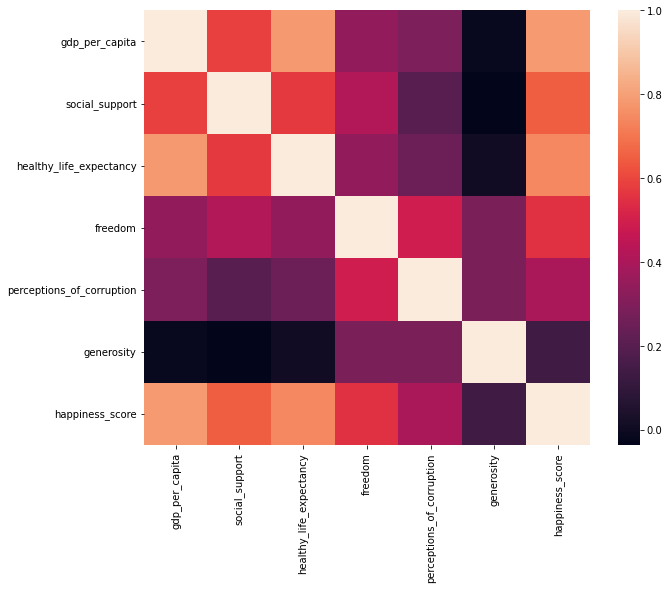

gdp_per_capita             0.789284
social_support             0.648799
healthy_life_expectancy    0.742456
freedom                    0.551258
happiness_score            1.000000
Name: happiness_score, dtype: float64
relevant features
Model coefs:  [0.47065046 0.18312271 0.26723071 0.30523489]
0.31437759750490546
0.30877145657978694
Model coefs:  [0.50395443 0.17795434 0.2397171  0.29532227]
0.3352608634991341
0.24511933200519412
Model coefs:  [0.47085226 0.18699843 0.25566904 0.29403061]
0.30630740803415984
0.3329743591240533
Model coefs:  [0.50134945 0.15928533 0.24893248 0.28463992]
0.2928489795265693
0.37294093331787054
Avg Train MSE:  0.3121987121411922
Avg Test MSE:  0.31495152025672624
Avg coefs:  [0.48670165 0.1768402  0.25288733 0.29480692]


In [ ]:
# standardize data 
def standard_scale(xTrain, xTest):
  stdScale = StandardScaler()
  # fit to training data
  stdScale.fit(xTrain)
  # scale data
  trainScaled = stdScale.transform(xTrain)
  testScaled = stdScale.transform(xTest)

  return trainScaled, testScaled

def remove_bad_rows(a, a_labels):
  a = np.concatenate((a,a_labels[:,None]),axis=1)
  # remove rows contianing NaN values
  a = a[~np.isnan(a).any(axis=1)]
  # remove rows containing non-finite values
  a = a[np.isfinite(a).any(axis=1)]
  # separate arrays
  a_labels = a[:, -1]
  a = np.delete(a, -1, axis=1)
  return a, a_labels

def linear_regression(xTrain, yTrain, xTest, coefs):
  model = LinearRegression()
  model.fit(xTrain, yTrain)
  print("Model coefs: ", model.coef_)
  coefs += model.coef_
  return model.predict(xTrain), model.predict(xTest), coefs

# PT1: cross validation splitting randomly
def kfold (xFeat): 
  #Reb*** I added .iloc and changed df_combined to xFeat here 
  #Sophia*** kfold shuffles data
  k = 4
  kf = KFold(n_splits=k, shuffle=True)
  train_MSE = 0
  test_MSE = 0
  coefs = np.zeros(xFeat.shape[1])

  for train_index, test_index in kf.split(xFeat):
    # generate x_train y_train x_test y_test
    x_train, x_test = xFeat.iloc[train_index], xFeat.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

   #reb *** convert to numpy for multi-dimensional indexing 
    x_train = x_train. to_numpy()
    x_test = x_test. to_numpy()
    y_train = y_train. to_numpy()
    y_test = y_test. to_numpy()

    # standardize 
    #Reb note*** I/m not sure if this is suppose to be x_test since the dunction returns testScaled?
    #Sophia note *** dropped year, so not standardized, add it back?
    x_train, x_test = standard_scale(x_train, x_test)
    x_train, y_train = remove_bad_rows(x_train, y_train)
    x_test, y_test = remove_bad_rows(x_test, y_test)

    y_pred_train, y_pred_test, coefs = linear_regression(x_train, y_train, x_test, coefs)
    print(mean_squared_error(y_train, y_pred_train))
    print(mean_squared_error(y_test, y_pred_test))
    train_MSE += mean_squared_error(y_train, y_pred_train)
    test_MSE += mean_squared_error(y_test, y_pred_test)
  print("Avg Train MSE: ", train_MSE/k)
  print("Avg Test MSE: ", test_MSE/k)
  print("Avg coefs: ", coefs/k)

# reb *** run regression with all features 
print("all features")
kfold(xFeat)   

#reb*** find the best features for linear regression 
#calculate pearson correlation 
correlation = combined.corr(method='pearson')
print(correlation) 

#heat map using Pearson Correlation
plt.figure(figsize = (10, 8))
sns.heatmap(correlation)
plt.show()

#Find corr with output variable "happiness_score"
cor = correlation['happiness_score']
#Select only features that is highly correlated with target, use abs
relevant_features = cor[abs(cor)>0.5]
not_relevant_features = cor[abs(cor)<=0.5]
print(relevant_features)

new_xFeat = combined.loc[:,combined.columns.isin(['gdp_per_capita','social_support', 'healthy_life_expectancy', 'freedom'])]

#regression with new dataframe of selected relevant features
print("relevant features") 
kfold(new_xFeat)


[0 0 0 0 0 1 0 2 2 0 3 0 1 4 4 0 4 0 0 0 4 5 0 4 4 4 6 3 4 0 4 0 5 3 7 3 0
 3 4 4 3 3 4 4 6 4 5 4 6 0 4 4 7 6 6 6 6 7 4 6 6 0 6 4 6 8 3 6 0 4 6 6 4 6
 7 8 6 3 5 3 6 5 7 9 6 6 6 6 4 3 6 9 3 0 6 5 8 3 0 6 7 5 8 4 3 8 9 3 6 9 8
 3 8 8 8 8 9 9 5 3 6 8 6 8 8 6 8 8 6 8 8 8 8 8 8 4 8 8 8 5 8 8 8 8 8 8 3 8
 8 8 8 8 8 9 8 3 8] [4 4 4 4 4 4 4 6 4 4 3 4 4 4 4 6 4 4 6 6 3 0 6 3 4 4 4 6 4 6 4 6 4 3 3 6 0
 3 4 4 6 6 6 3 6 3 6 4 6 6 4 8 0 6 6 6 6 0 8 6 3 6 6 3 8 6 6 3 3 6 6 6 6 6
 0 8 3 3 6 3 3 8 6 6 6 3 6 3 6 3 3 8 6 6 3 6 8 3 6 6 6 8 8 3 3 8 3 3 3 4 8
 3 8 8 8 8 6 8 8 3 6 8 6 8 8 3 8 8 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 3 8]
79
0.7492063492063492
[0 0 0 0 1 0 0 0 2 2 3 4 0 4 1 4 0 0 0 3 0 3 4 5 4 0 4 3 0 4 6 4 4 5 3 0 0
 7 3 4 4 4 4 6 6 7 7 4 3 0 4 6 4 6 6 6 4 4 6 6 5 6 3 6 4 0 0 3 6 6 8 7 6 5
 5 3 6 8 9 6 9 3 6 7 8 6 6 0 6 5 8 3 6 8 6 6 8 4 5 7 8 0 3 6 4 6 3 3 9 3 6
 3 8 8 8 8 9 8 4 8 9 8 8 8 8 8 6 8 5 6 8 9 8 6 3 3 8 8 8 8 8 8 8 8 5 8 8 8
 8 8 8 8 9 8 8 3 8 8] [7 7 0 7 7 7 7 7

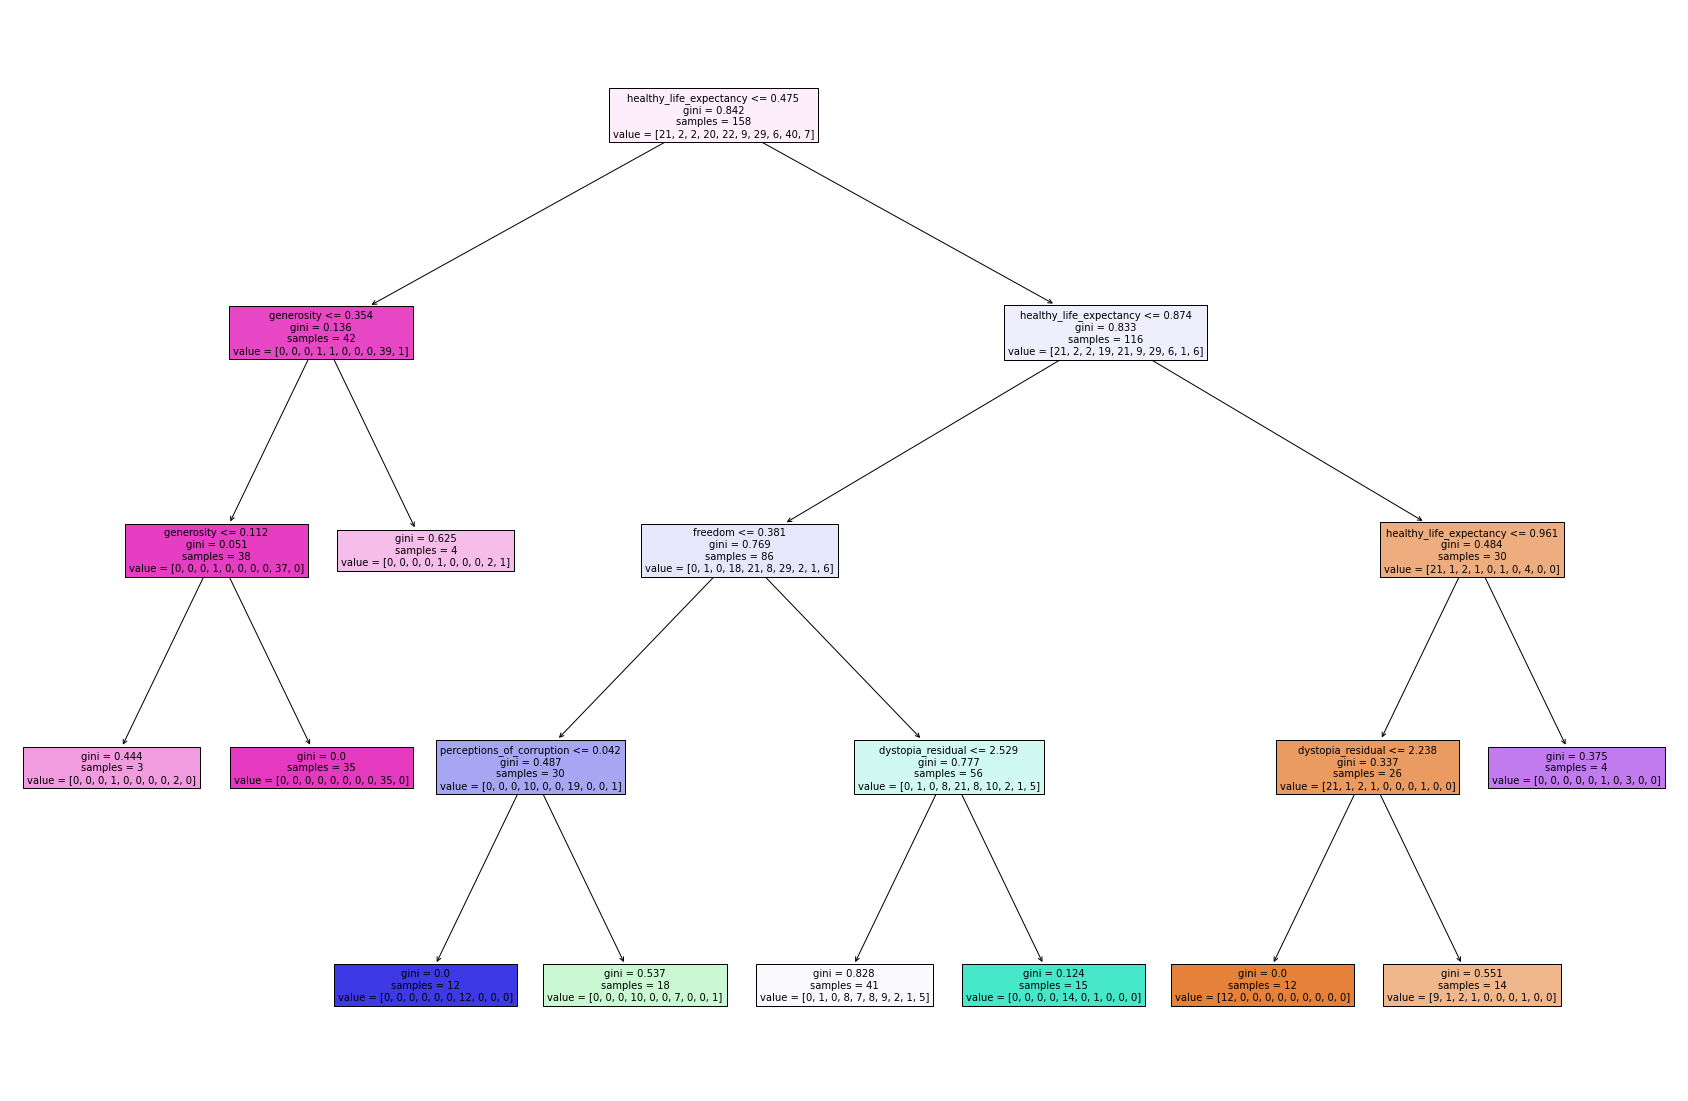

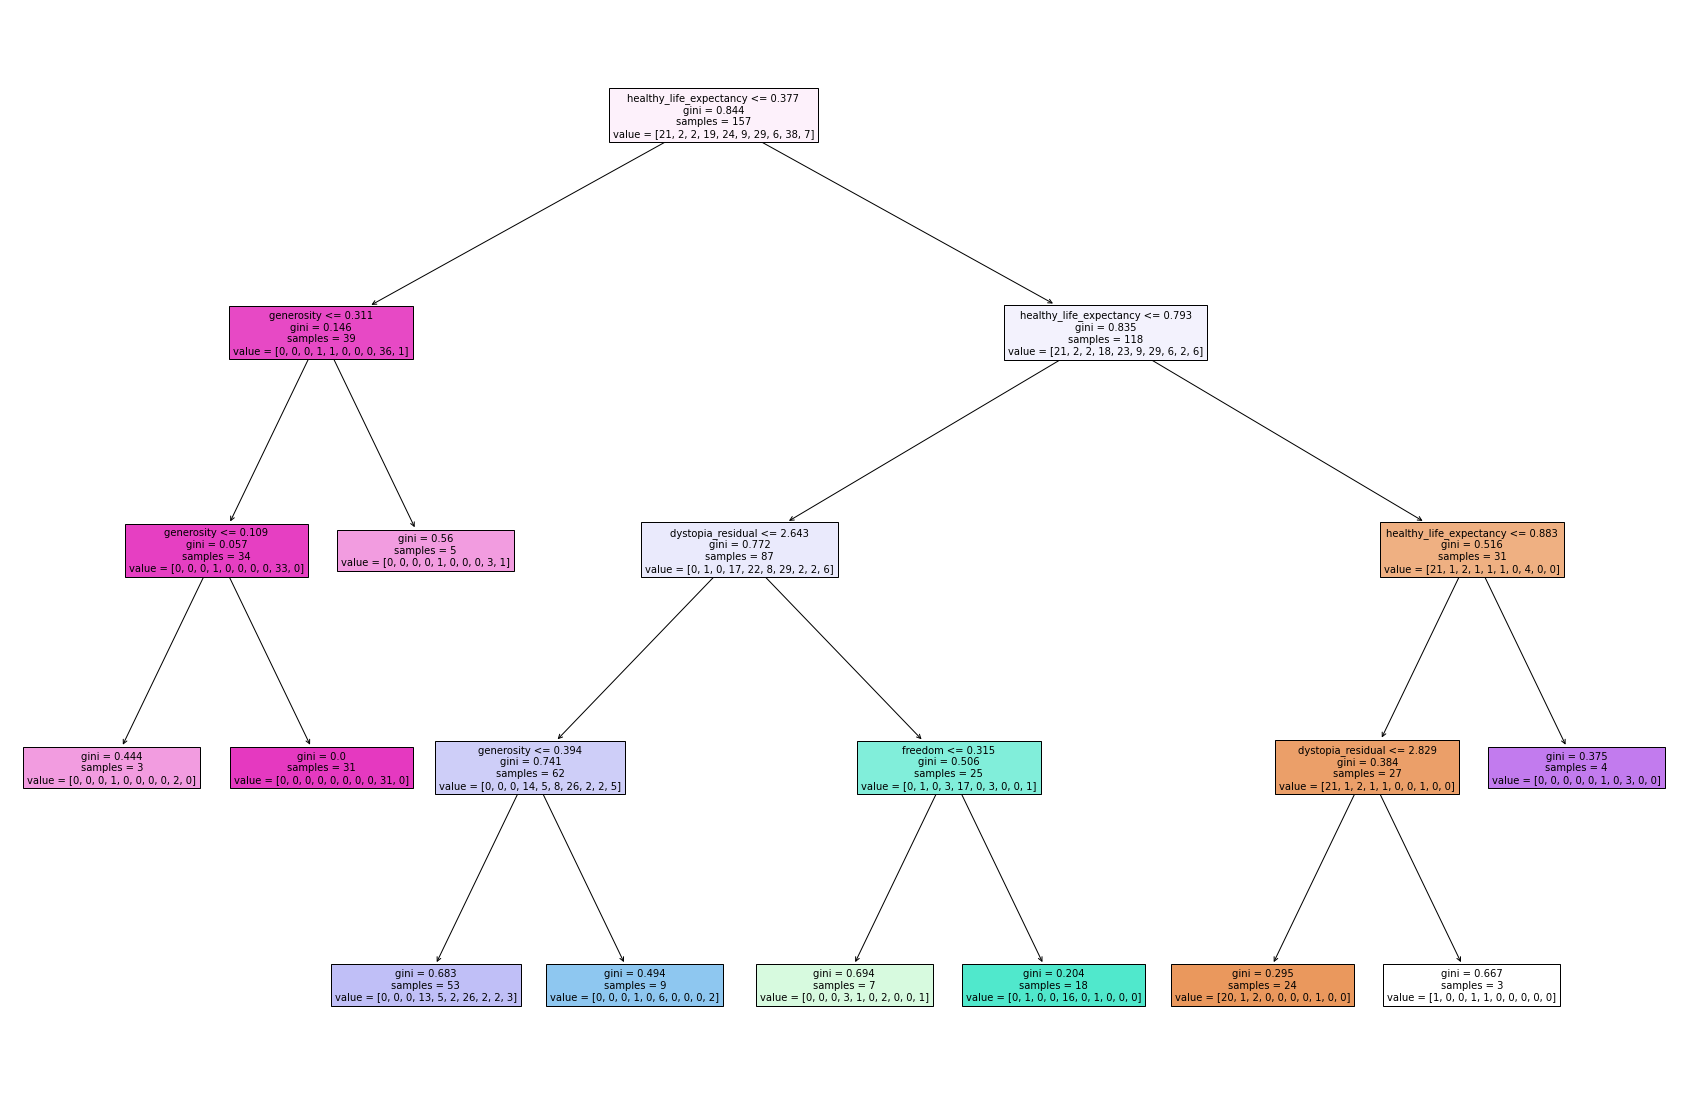

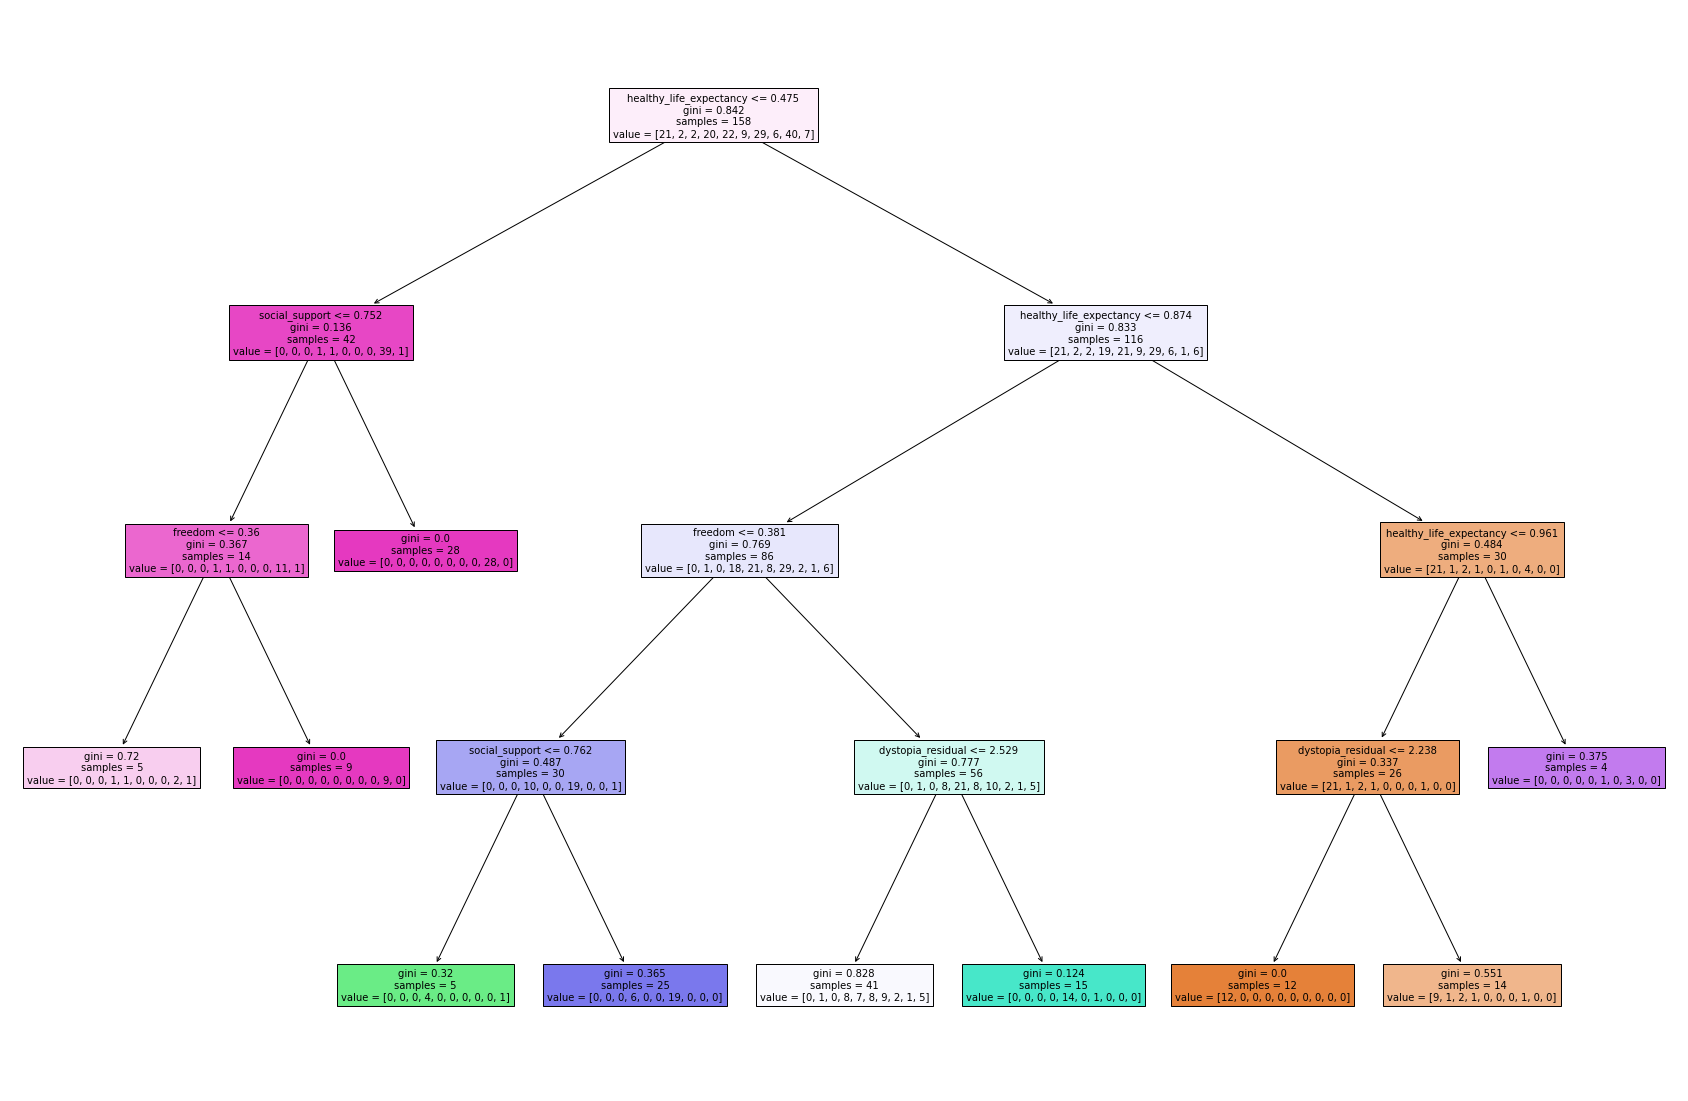

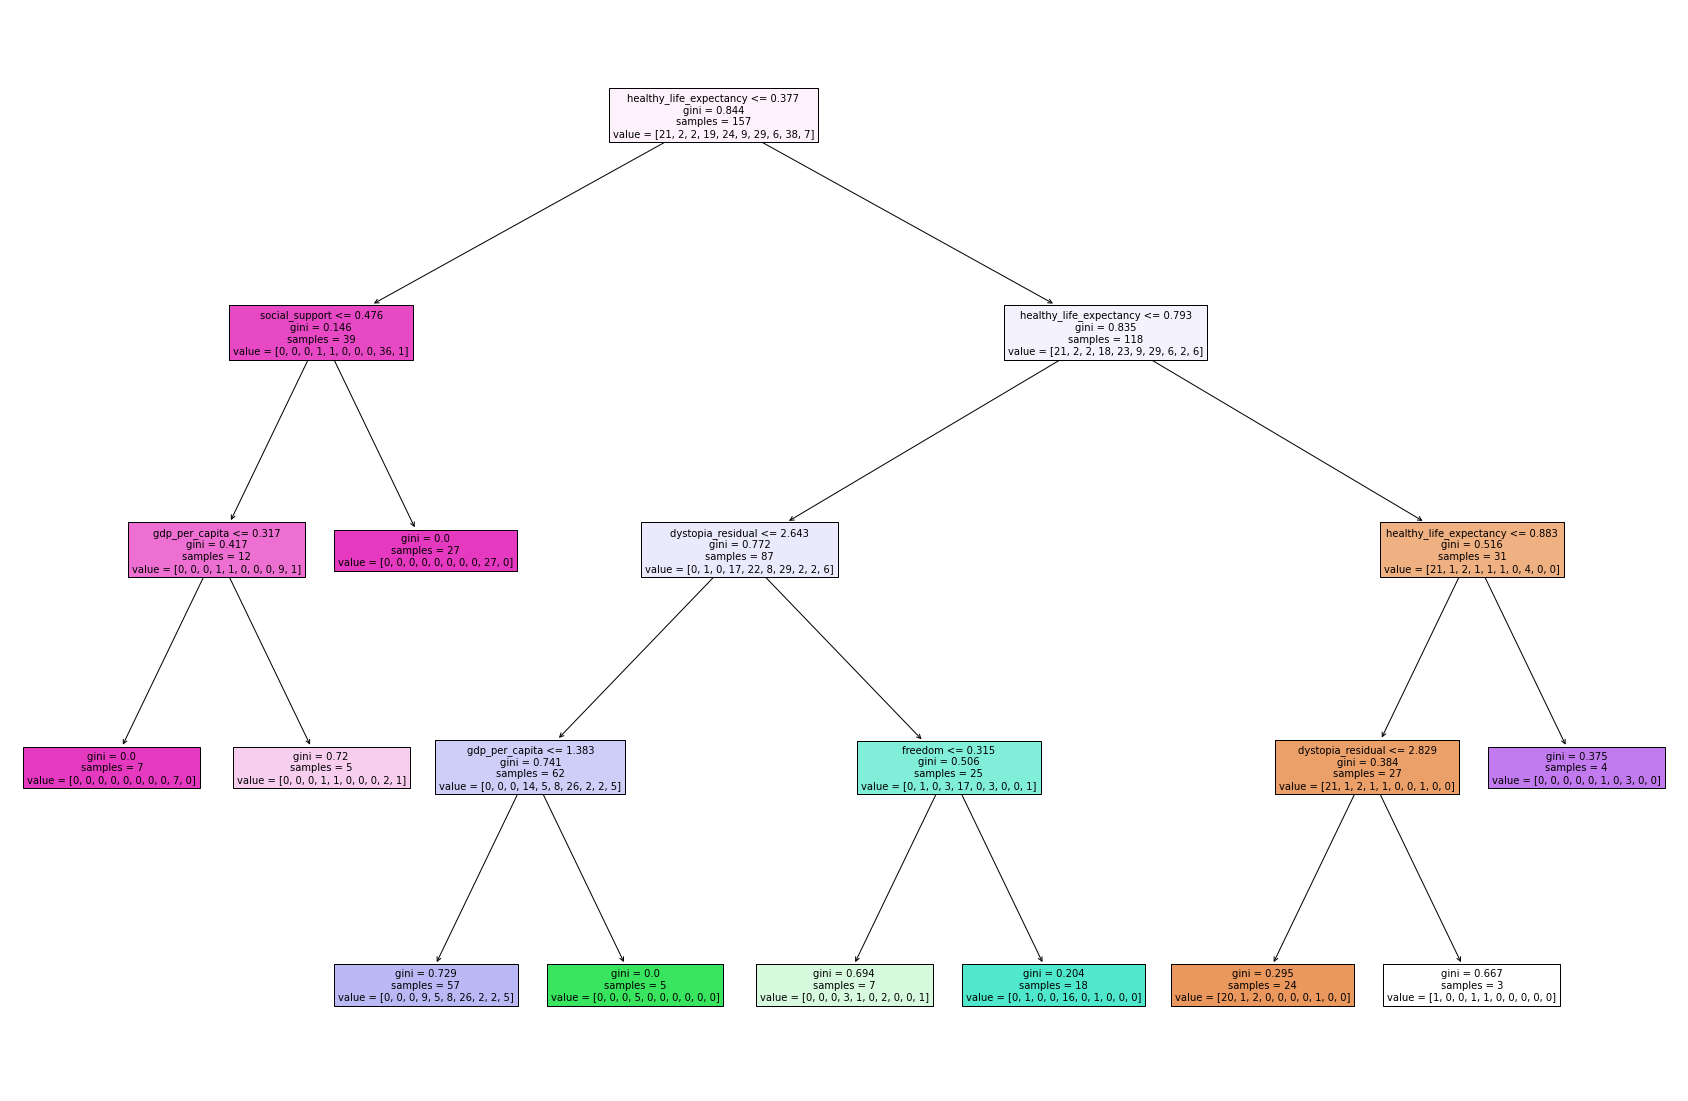

In [ ]:
# PT2: decision tree, do consensus factors predict region (ie are beliefs/responses indicative of region)

def decision_tree(x_train, y_train, x_test, y_test):
  yHat = []
  # create decision tree
  clf = tree.DecisionTreeClassifier(criterion="gini", max_depth = 4, min_samples_leaf = 3)
  clf = clf.fit(x_train, y_train)
  yHat = clf.predict(x_test)
  #reb *** note visualize graph 
  plt.figure (figsize = (30,20))
  graph = tree.plot_tree(clf, 
                         feature_names= x_train.columns,
                         filled=True, fontsize = 10)
  #return yHat, graph
  return yHat

def num_mistakes(y_pred, y_true):
  mistakes = 0
  print(y_true, y_pred)

  for i in range(len(y_true)):
    if (y_true[i] != y_pred[i]):
      mistakes += 1
  
  return mistakes

for year in xFeat2['year'].unique():
  trainIdx = xFeat2['year'] == year
  testIdx = xFeat2['year'] != year

  # generate x_train y_train x_test y_test
  x_train = xFeat2[trainIdx]
  x_test = xFeat2[testIdx]
  y_train = y2_num[trainIdx]
  y_test = y2_num[testIdx]

  # decision tree
  #yPred, graph = decision_tree(x_train,y_train,x_test,y_test)
  yPred = decision_tree(x_train,y_train,x_test,y_test)


  mistakes = num_mistakes(yPred, y_test.transpose().to_numpy()[0])
  print(mistakes)
  print(1-(mistakes/xFeat2.shape[0]))    

rel_xFeat2 = xFeat2.drop(columns=['perceptions_of_corruption', 'generosity'])
for year in rel_xFeat2['year'].unique():
  trainIdx = rel_xFeat2['year'] == year
  testIdx = rel_xFeat2['year'] != year

  # generate x_train y_train x_test y_test
  x_train = rel_xFeat2[trainIdx]
  x_test = rel_xFeat2[testIdx]
  y_train = y2_num[trainIdx]
  y_test = y2_num[testIdx]

  # decision tree
  #yPred, graph = decision_tree(x_train,y_train,x_test,y_test)
  yPred = decision_tree(x_train,y_train,x_test,y_test)

  mistakes = num_mistakes(yPred, y_test.transpose().to_numpy()[0])
  print(mistakes)
  print(1-(mistakes/xFeat2.shape[0]))    


In [ ]:
#reb ***decision tree for part 2
#For each region type, we will create a new decision tree, with the output being whether or not the sample is of that region.
#create datasets for each region 
print(y2)
#print 10 distinct regions 
print(y2["region"].unique())
print(xFeat2)

#make new y based on region where 1 = sample is in region and 0 = not in region

#Western Europe  
y_w_eur = y2.copy()
y_w_eur.loc[y_w_eur['region'] ==  'Western Europe'] = 1
y_w_eur.loc[y_w_eur['region'] !=  1] = 0
print("--- Western Europe Stats---")
print(y_w_eur['region'].value_counts())

# North America
y_n_am = y2.copy()
y_n_am.loc[y_n_am['region'] ==  'North America'] = 1
y_n_am.loc[y_n_am['region'] !=  1] = 0
print("--- North America Stats---")
print(y_n_am['region'].value_counts())

#Australia and New Zealand
y_a_nz = y2.copy()
y_a_nz.loc[y_a_nz['region'] ==  'Australia and New Zealand'] = 1
y_a_nz.loc[y_a_nz['region'] !=  1] = 0
print("--- Australia and New Zealand Stats---")
print(y_a_nz['region'].value_counts())

#Middle East and Northern Africa
y_me_na = y2.copy()
y_me_na.loc[y_me_na['region'] ==  'Middle East and Northern Africa'] = 1
y_me_na.loc[y_me_na['region'] !=  1] = 0
print("--- Middle East and Northern Africa Stats---")
print(y_me_na['region'].value_counts())

#Latin America and Caribbean
y_la_c = y2.copy()
y_la_c.loc[y_la_c['region'] ==  'Latin America and Caribbean'] = 1
y_la_c.loc[y_la_c['region'] !=  1] = 0
print("--- Latin America and Caribbean Stats---")
print(y_la_c['region'].value_counts())

#Southeastern Asia
y_se_a = y2.copy()
y_se_a.loc[y_se_a['region'] ==  'Southeastern Asia'] = 1
y_se_a.loc[y_se_a['region'] !=  1] = 0
print("--- Southeastern Asia Stats---")
print(y_se_a['region'].value_counts())

#Central and Eastern Europe
y_c_ee = y2.copy()
y_c_ee.loc[y_c_ee['region'] ==  'Central and Eastern Europe'] = 1
y_c_ee.loc[y_c_ee['region'] !=  1] = 0
print("--- Central and Eastern Europe Stats---")
print(y_c_ee['region'].value_counts())

#Eastern Asia
y_e_a = y2.copy()
y_e_a.loc[y_e_a['region'] ==  'Eastern Asia'] = 1
y_e_a.loc[y_e_a['region'] !=  1] = 0
print("--- Eastern Asia Stats---")
print(y_e_a['region'].value_counts())

#Sub-Saharan Africa
y_ss_a = y2.copy()
y_ss_a.loc[y_ss_a['region'] ==  'Sub-Saharan Africa'] = 1
y_ss_a.loc[y_ss_a['region'] !=  1] = 0
print("--- Sub-Saharan Africa Stats---")
print(y_ss_a['region'].value_counts())

#Southern Asia
y_s_a = y2.copy()
y_s_a.loc[y_s_a['region'] ==  'Southern Asia'] = 1
y_s_a.loc[y_s_a['region'] !=  1] = 0
print("--- Southern Asia Stats---")
print(y_s_a['region'].value_counts())

                              region
0                     Western Europe
1                     Western Europe
2                     Western Europe
3                     Western Europe
4                      North America
..                               ...
152               Sub-Saharan Africa
153                    Southern Asia
154               Sub-Saharan Africa
155  Middle East and Northern Africa
156               Sub-Saharan Africa

[315 rows x 1 columns]
['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']
     happiness_rank  happiness_score  ...  dystopia_residual  year
0                 1            7.587  ...            2.51738  2015
1                 2            7.561  ...            2.70201  2015
2                 3            7.527  ...            2.49204  2015
3                 4            7.

western europe
Middle East and Northern Africa
Latin America and Caribbean
Central and Eastern Europe
Sub-Saharan Africa


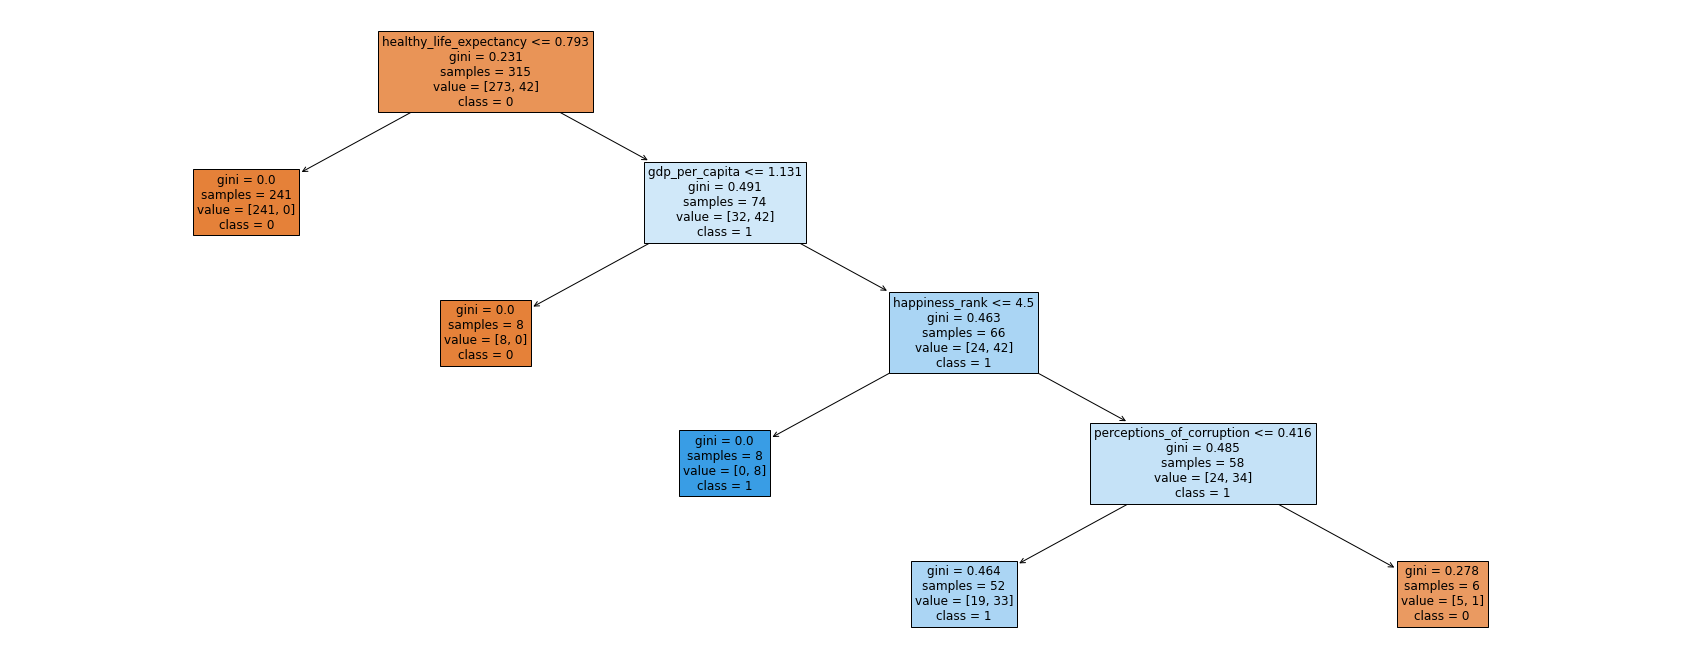

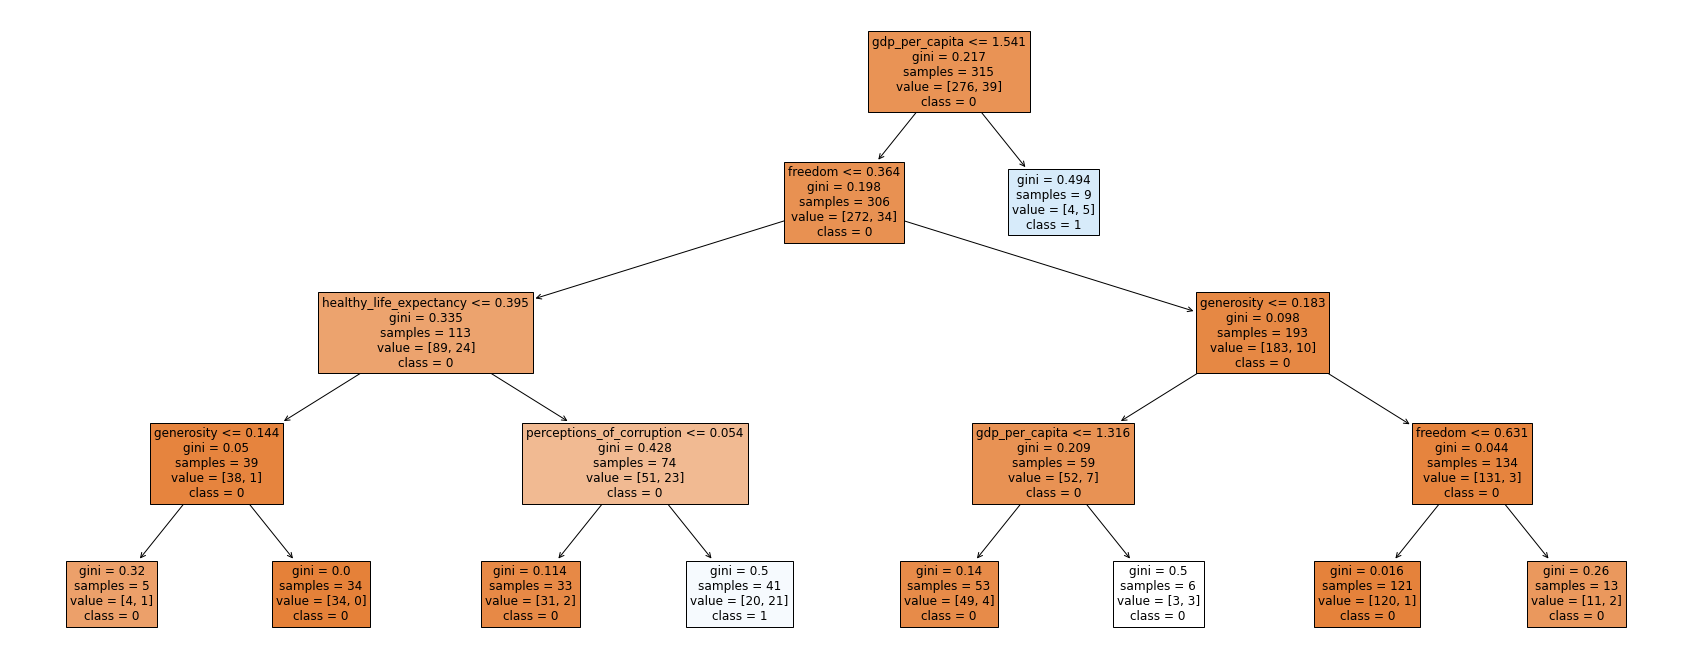

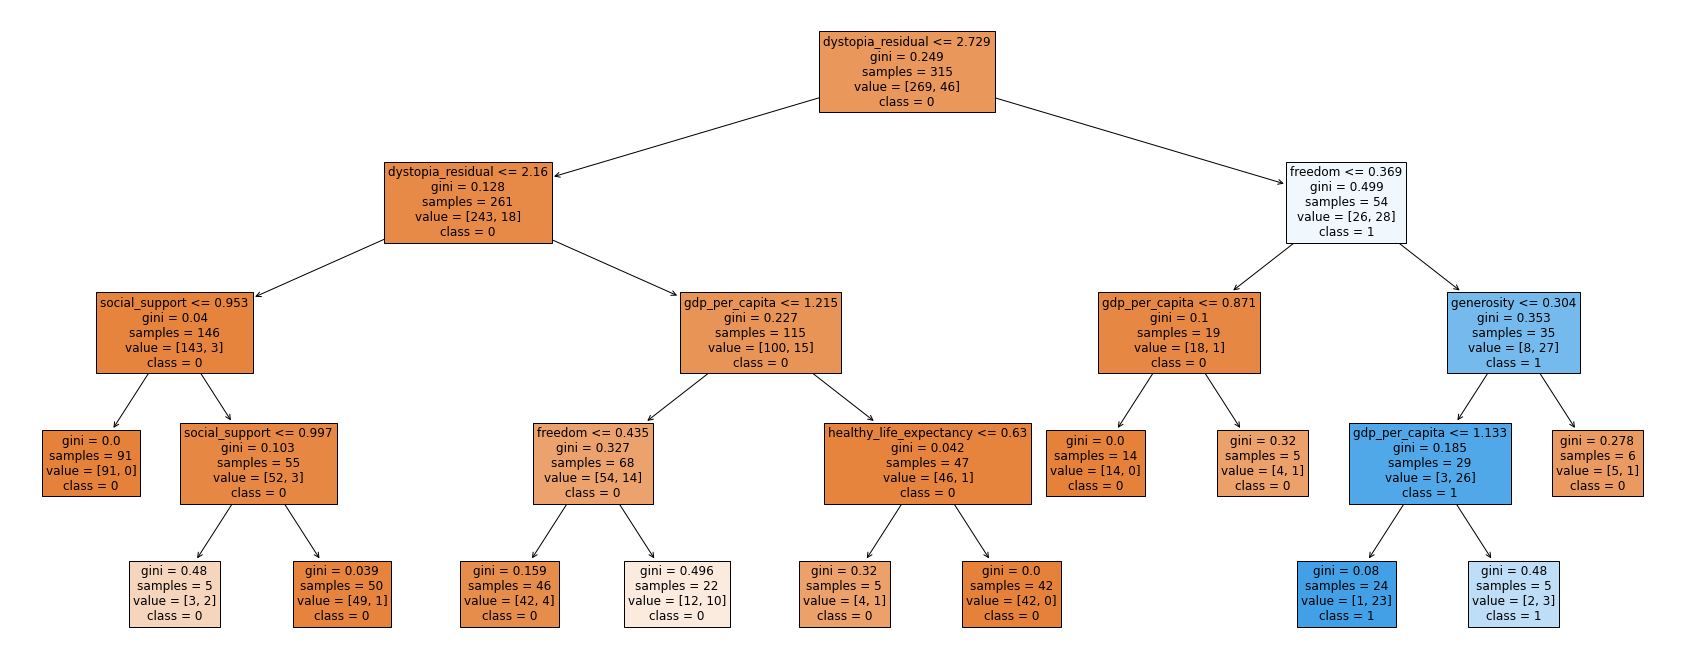

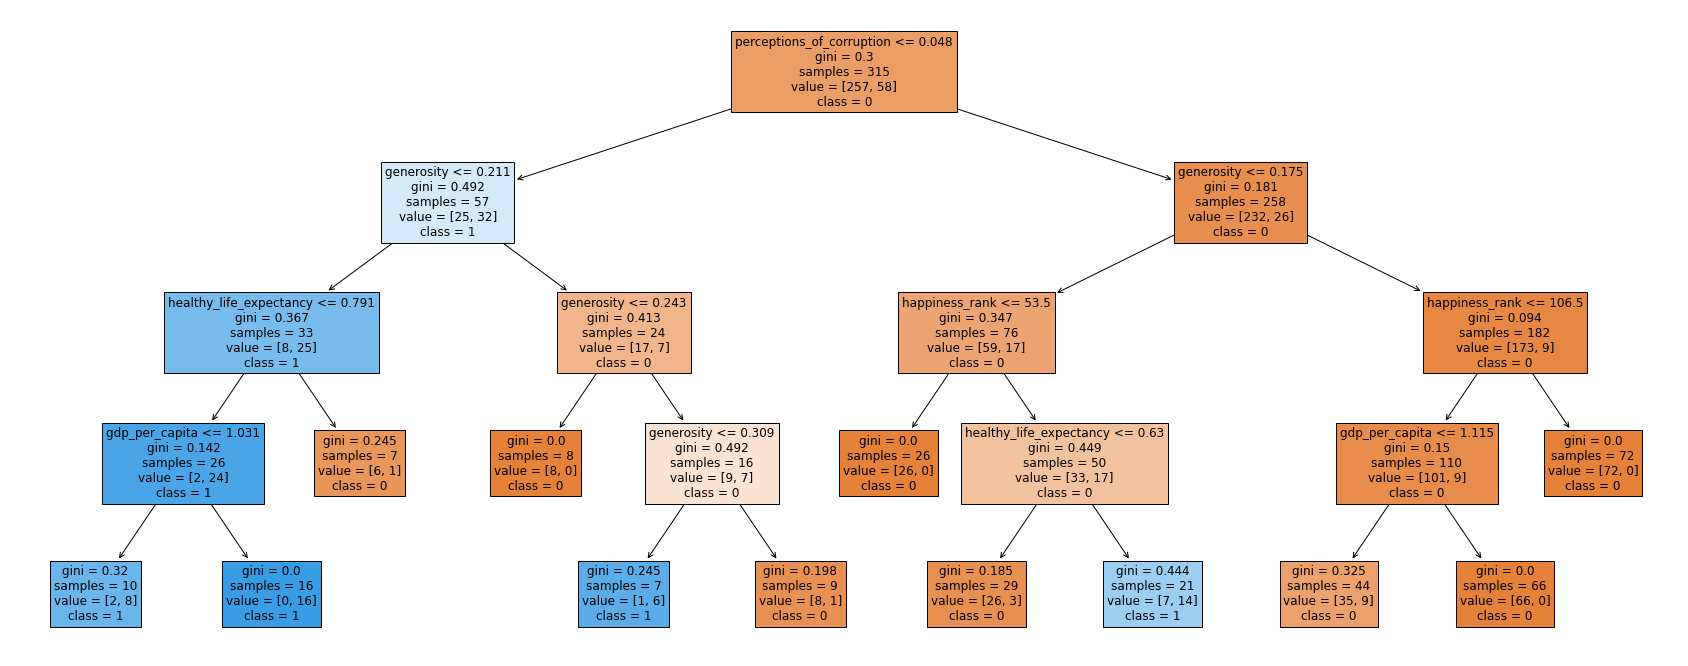

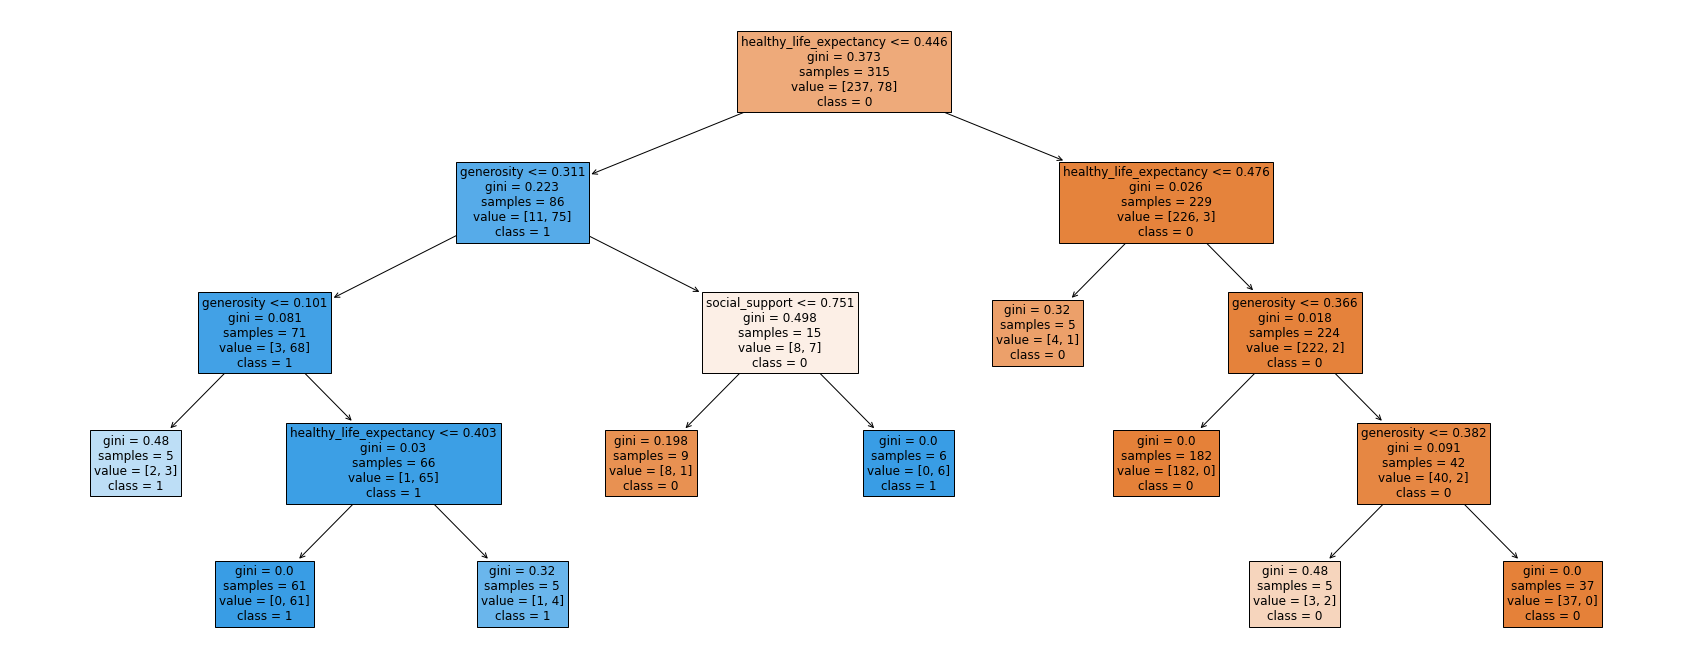

In [ ]:
#function to visualize a tree just based on training data for each region 
def vistree (xFeat, y): 
    y=y.astype('int')
    clf = tree.DecisionTreeClassifier(criterion="gini", max_depth= 4, min_samples_leaf=5)
    # Train Decision Tree Classifer 
    clf = clf.fit(xFeat,y)
    plt.figure (figsize = (30,12))
    a = tree.plot_tree(clf, 
                   feature_names=xFeat.columns,  
                   class_names= ['0', '1'],
                   filled=True, fontsize = 12)

#omit regions with less than 20 samples for now 
#western europe 
print("western europe")
t1 = vistree(xFeat2, y_w_eur)

#Middle East and Northern Africa
print("Middle East and Northern Africa")
t4 = vistree(xFeat2, y_me_na)

#Latin America and Caribbean
print("Latin America and Caribbean")
t5 = vistree(xFeat2, y_la_c)

#Central and Eastern Europe
print("Central and Eastern Europe")
t7 = vistree(xFeat2, y_c_ee)

#Sub-Saharan Africa
print("Sub-Saharan Africa")
t8 = vistree(xFeat2, y_ss_a)